# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#locality_name-—-название-населённого-пункта" data-toc-modified-id="locality_name-—-название-населённого-пункта-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>locality_name — название населённого пункта</a></span><ul class="toc-item"><li><span><a href="#Функция-для-заполнения-пропусков-из-того-же-города" data-toc-modified-id="Функция-для-заполнения-пропусков-из-того-же-города-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Функция для заполнения пропусков из того же города</a></span></li></ul></li><li><span><a href="#ceiling_height-высота-потолков-(м)" data-toc-modified-id="ceiling_height-высота-потолков-(м)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ceiling_height высота потолков (м)</a></span></li><li><span><a href="#floors_total----всего-этажей-в-доме" data-toc-modified-id="floors_total----всего-этажей-в-доме-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>floors_total -  всего этажей в доме</a></span></li><li><span><a href="#living_area-жилая-площадь-в-квадратных-метрах-(м²)" data-toc-modified-id="living_area-жилая-площадь-в-квадратных-метрах-(м²)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>living_area жилая площадь в квадратных метрах (м²)</a></span></li><li><span><a href="#is_apartment---апартаменты-(булев-тип)" data-toc-modified-id="is_apartment---апартаменты-(булев-тип)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>is_apartment - апартаменты (булев тип)</a></span></li><li><span><a href="#kitchen_area----площадь-кухни-в-квадратных-метрах-(м²)" data-toc-modified-id="kitchen_area----площадь-кухни-в-квадратных-метрах-(м²)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>kitchen_area  - площадь кухни в квадратных метрах (м²)</a></span></li><li><span><a href="#balcony--—-число-балконов" data-toc-modified-id="balcony--—-число-балконов-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>balcony  — число балконов</a></span></li><li><span><a href="#airports_nearest-—-расстояние-до-ближайшего-аэропорта-в-метрах-(м)" data-toc-modified-id="airports_nearest-—-расстояние-до-ближайшего-аэропорта-в-метрах-(м)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</a></span></li><li><span><a href="#city_centers_nearest-—-расстояние-до-центра-города-(м)" data-toc-modified-id="city_centers_nearest-—-расстояние-до-центра-города-(м)-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>city_centers_nearest — расстояние до центра города (м)</a></span></li><li><span><a href="#parks_around3000--—-число-парков-в-радиусе-3-км" data-toc-modified-id="parks_around3000--—-число-парков-в-радиусе-3-км-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>parks_around3000  — число парков в радиусе 3 км</a></span></li><li><span><a href="#parks_nearest-—-расстояние-до-ближайшего-парка-(м)" data-toc-modified-id="parks_nearest-—-расстояние-до-ближайшего-парка-(м)-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>parks_nearest — расстояние до ближайшего парка (м)</a></span></li><li><span><a href="#ponds_around3000---—-число-водоёмов-в-радиусе-3-км" data-toc-modified-id="ponds_around3000---—-число-водоёмов-в-радиусе-3-км-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>ponds_around3000   — число водоёмов в радиусе 3 км</a></span></li><li><span><a href="#ponds_nearest--—-расстояние-до-ближайшего-водоёма-(м)" data-toc-modified-id="ponds_nearest--—-расстояние-до-ближайшего-водоёма-(м)-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>ponds_nearest  — расстояние до ближайшего водоёма (м)</a></span></li><li><span><a href="#days_exposition--—-сколько-дней-было-размещено-объявление-(от-публикации-до-снятия)" data-toc-modified-id="days_exposition--—-сколько-дней-было-размещено-объявление-(от-публикации-до-снятия)-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>days_exposition  — сколько дней было размещено объявление (от публикации до снятия)</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.16"><span class="toc-item-num">2.16&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.17"><span class="toc-item-num">2.17&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Этаж-квартиры;-варианты-—-первый,-последний,-другой" data-toc-modified-id="Этаж-квартиры;-варианты-—-первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этаж квартиры; варианты — первый, последний, другой</a></span></li><li><span><a href="#Cоотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="Cоотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Cоотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li><li><span><a href="#Расстояние-до-центра-в-киллометрах" data-toc-modified-id="Расстояние-до-центра-в-киллометрах-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Расстояние до центра в киллометрах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Постройте-гистограммы-для-каждого-параметра." data-toc-modified-id="Изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Постройте-гистограммы-для-каждого-параметра.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучите-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Изучите-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили." data-toc-modified-id="Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучите,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучите-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучите,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучите-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Колличество-комнат" data-toc-modified-id="Колличество-комнат-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Колличество комнат</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Расстояние до центра</a></span></li><li><span><a href="#Дата-размещения" data-toc-modified-id="Дата-размещения-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Дата размещения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитайте-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-locality_name." data-toc-modified-id="Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитайте-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-locality_name.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучите-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-(locality_name).-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется,-—-это-и-будет-центральная-зона." data-toc-modified-id="Изучите-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-(locality_name).-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется,-—-это-и-будет-центральная-зона.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.</a></span></li><li><span><a href="#Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всему-городу?" data-toc-modified-id="Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всему-городу?-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Колличество-комнат" data-toc-modified-id="Колличество-комнат-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Колличество комнат</a></span></li><li><span><a href="#Стоимость" data-toc-modified-id="Стоимость-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Стоимость</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.7.4"><span class="toc-item-num">4.7.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры-в-центре" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-в-центре-4.7.5"><span class="toc-item-num">4.7.5&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры в центре</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.7.6"><span class="toc-item-num">4.7.6&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Этаж" data-toc-modified-id="Этаж-4.7.7"><span class="toc-item-num">4.7.7&nbsp;&nbsp;</span>Этаж</a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-4.7.8"><span class="toc-item-num">4.7.8&nbsp;&nbsp;</span>Расстояние до центра</a></span></li><li><span><a href="#Дата-размещения-объявления" data-toc-modified-id="Дата-размещения-объявления-4.7.9"><span class="toc-item-num">4.7.9&nbsp;&nbsp;</span>Дата размещения объявления</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.7.10"><span class="toc-item-num">4.7.10&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t")

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
df = df. rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [7]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Согласно документации к данным:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*balcony — число балконов
*ceiling_height — высота потолков (м)
*city_centers_nearest — расстояние до центра города (м)
*days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*first_day_exposition — дата публикации
*floor — этаж
*floors_total — всего этажей в доме
*is_apartment — апартаменты (булев тип)
*kitchen_area — площадь кухни в квадратных метрах (м²)
*last_price — цена на момент снятия с публикации
*living_area — жилая площадь в квадратных метрах (м²)
*locality_name — название населённого пункта
*open_plan — свободная планировка (булев тип)
*parks_around3000 — число парков в радиусе 3 км
*parks_nearest — расстояние до ближайшего парка (м)
*ponds_around3000 — число водоёмов в радиусе 3 км
*ponds_nearest — расстояние до ближайшего водоёма (м)
*rooms — число комнат
*studio — квартира-студия (булев тип)
*total_area — площадь квартиры в квадратных метрах (м²)
*total_images — число фотографий квартиры в объявлении

### Вывод

Файл с данными открыт. Всего в таблице 23699 строк. Выведена основная информация по столбцам. Обнаружены проблемы:
- встречаются пропуски данных NaN;
- числовые столбцов имеют тип *float64*, нужен тип *int*.
- столбец *is_appartment* предполагает логическое значение, но в исходных данных имеет тип *object*.

## Предобработка данных

Взглянем на число отсутсвующих данных

In [8]:
df.isnull().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### locality_name — название населённого пункта

Взглянем на число пропусков

In [9]:
df['locality_name'].isnull().sum()

49

In [10]:
df['locality_name'] = df['locality_name'].str.lower()

In [11]:
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Название населеного пункта мы не сможем просто так подобрать поэтому заменим пропуски 'unknown'

In [12]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [13]:
df['locality_name'].isnull().sum()

0

#### Функция для заполнения пропусков из того же города

Для дальнейшего заполнения пропусков, можно использовать медиану по тому же городу что и пропуск. Для этого сделаем функцию replace_city

In [14]:
def replace_city(colum_replace):
    df[colum_replace] = df[colum_replace].fillna(df.groupby('locality_name')[colum_replace].transform('median'))

### ceiling_height высота потолков (м)

Взглянем на число пропусков

In [15]:
df['ceiling_height'].isnull().sum()

9195

Заменим значения медианой из того же города.

In [16]:
replace_city('ceiling_height')

In [17]:
df['ceiling_height'].isnull().sum()

121

Остались пропуски. Остальные значения заменим обычной медианой

In [18]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Остались ли пропуски

In [19]:
df['ceiling_height'].isnull().sum()

0

### floors_total -  всего этажей в доме

Посмотрим на колличество пропусков

In [20]:
df['floors_total'].isnull().sum()

86

Заменим значения медианой из того же города.

In [21]:
replace_city('floors_total')

Если дома, где этаж проживания оказался выше самого здания, то заменим высоту здания на этаж проживания

In [22]:
df.loc[df['floors_total']<df['floor'],'floors_total'] = df['floor']

Остались ли пропуски

In [23]:
df['floors_total'].isnull().sum()

0

### living_area жилая площадь в квадратных метрах (м²)

Посмотрим на колличество пропусков

In [24]:
df['living_area'].isnull().sum()

1903

In [25]:
replace_city('living_area')

In [26]:
df['living_area'].isnull().sum()

17

Остальное заполним медианой

In [27]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [28]:
df['living_area'].isnull().sum()

0

### is_apartment - апартаменты (булев тип)

Посмотрим на колличество пропусков

In [29]:
df['is_apartment'].isnull().sum()

20924

In [30]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Скорее всего пропущеные значения означают что апартаментов нет, так что заменим все пропуски False

In [31]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Остались ли пропуски

In [32]:
df['is_apartment'].isnull().sum()

0

### kitchen_area  - площадь кухни в квадратных метрах (м²)

Посмотрим на колличество пропусков

In [33]:
df['kitchen_area'].isnull().sum()

2278

Общую площадь total_area можно представить как сумму living_area + kitchen_area +  другое, например ванная, туалет. Предположу что другое будет занимать половину от кухни. Тогда 1.5 kitchen_area = total_area - living_area. Заменим пропуски используя данное выражение 

In [34]:
df.loc[df['kitchen_area'].isnull(), 'kitchen_area'] = (df['total_area']-df['living_area']) / 1.5

Остались ли пропуски

In [35]:
df['kitchen_area'].isnull().sum()

0

### balcony  — число балконов

Посмотрим на колличество пропусков

In [36]:
df['balcony'].isnull().sum()

11519

In [37]:
sorted(df['balcony'].unique())

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

Скорее всего пропуски означают, что балкона нет. Заменим пропуски нулем(0)

In [38]:
df['balcony'] = df['balcony'].fillna(0)

Остались ли пропуски

In [39]:
df['balcony'].isnull().sum()

0

### airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

Посмотрим на колличество пропусков

In [40]:
df['airports_nearest'].isnull().sum()

5542

In [41]:
replace_city('airports_nearest')

In [42]:
df['airports_nearest'].isnull().sum()

5386

In [43]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

In [44]:
df['airports_nearest'].isnull().sum()

0

### city_centers_nearest — расстояние до центра города (м)

Посмотрим на колличество пропусков

In [45]:
df['city_centers_nearest'].isnull().sum()

5519

In [46]:
replace_city('city_centers_nearest')

In [47]:
df['city_centers_nearest'].isnull().sum()

5386

In [48]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

In [49]:
df['city_centers_nearest'].isnull().sum()

0

### parks_around3000  — число парков в радиусе 3 км    

Посмотрим на колличество пропусков

In [50]:
df['parks_around3000'].isnull().sum()

5518

In [51]:
sorted(df['parks_around3000'].unique())

[0.0, 1.0, 2.0, nan, 3.0]

Заполним пропуски медианой этого же города

In [52]:
df['parks_around3000'].isnull().sum()

5518

Если в колонке ponds_nearest есть растояние которое <3000 , то заполним parks_around3000 единицей(1), если нет то нулем(0)

In [53]:
df.loc[(df['ponds_nearest']<=3000)&(df['parks_around3000'].isna()),'parks_around3000'] = 1


In [54]:
df['parks_around3000'].isna().sum()

5518

In [55]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [56]:
df['parks_around3000'].isnull().sum()

0

### parks_nearest — расстояние до ближайшего парка (м)

Посмотрим на колличество пропусков

In [57]:
df['parks_nearest'].isnull().sum()

15620

In [58]:
replace_city('parks_nearest')

In [59]:
df['parks_nearest'].isnull().sum()

5998

In [60]:
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())

In [61]:
df['parks_nearest'].isnull().sum()

0

### ponds_around3000   — число водоёмов в радиусе 3 км       

Посмотрим на колличество пропусков

In [62]:
df['ponds_around3000'].isnull().sum()

5518

In [63]:
sorted(df['ponds_around3000'].unique())

[0.0, 1.0, 2.0, 3.0, nan]

In [64]:
df['ponds_around3000']= df['ponds_around3000'].fillna(0.0)

In [65]:
df['ponds_around3000'].isnull().sum()

0

### ponds_nearest  — расстояние до ближайшего водоёма (м)         

Посмотрим на колличество пропусков

In [66]:
df['ponds_nearest'].isnull().sum()

14589

In [67]:
replace_city('ponds_nearest')

In [68]:
df['ponds_nearest'].isnull().sum()

5494

In [69]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())

In [70]:
df['ponds_nearest'].isnull().sum()

0

### days_exposition  — сколько дней было размещено объявление (от публикации до снятия)    

Посмотрим на колличество пропусков

In [71]:
df['days_exposition'].isnull().sum()

3181

In [72]:
replace_city('days_exposition')

In [73]:
df['days_exposition'].isnull().sum()

80

In [74]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

In [75]:
df['days_exposition'].isnull().sum()

0

Проверим остались ли пропуски

In [76]:
df.isna().mean()

total_images            0.0
last_price              0.0
total_area              0.0
first_day_exposition    0.0
rooms                   0.0
ceiling_height          0.0
floors_total            0.0
living_area             0.0
floor                   0.0
is_apartment            0.0
studio                  0.0
open_plan               0.0
kitchen_area            0.0
balcony                 0.0
locality_name           0.0
airports_nearest        0.0
city_centers_nearest    0.0
parks_around3000        0.0
parks_nearest           0.0
ponds_around3000        0.0
ponds_nearest           0.0
days_exposition         0.0
dtype: float64

### Замена типа данных

In [77]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.000000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,False,...,11.000000,2.0,посёлок шушары,12817.0,18603.0,0.0,460.0,0.0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,31.3,9,False,...,85.133333,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.000000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [78]:
colums_int = ['last_price', 'floors_total', 'balcony', 'city_centers_nearest','airports_nearest',
               'parks_around3000','parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',]

In [79]:
for i in colums_int:
    df[i]=df[i].astype('int')

In [80]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [81]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.000000,0,санкт-петербург,18863,16028,1,482,2,755,95
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,11.000000,2,посёлок шушары,12817,18603,0,460,0,584,81
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,8.300000,0,санкт-петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,85.133333,0,санкт-петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.000000,0,санкт-петербург,31856,8098,2,112,1,48,121


### Дубликаты

In [82]:
print('дубликатов',df.duplicated().sum())

дубликатов 0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
city_centers_nearest    23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

### Вывод

Заполнили пропуки в столбах is_apartment пропуски заменены на False balcony на 0, остальные пропуски заменил средним числом по городу.
Заменили типы данных столбцов заменены на более подходящие
Дубликаты не найдены

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [84]:
df['sqm_price'] = df['last_price'] / df['total_area']

In [85]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863,16028,1,482,2,755,95,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,2,посёлок шушары,12817,18603,0,460,0,584,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,0,санкт-петербург,21741,13933,1,90,2,574,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,0,санкт-петербург,28098,6800,2,84,3,234,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,санкт-петербург,31856,8098,2,112,1,48,121,100000.000000


In [86]:
df['sqm_price'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: sqm_price, dtype: float64

### День недели, месяц и год публикации объявления

In [87]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [88]:
df['month']   = df['first_day_exposition'].dt.month

In [89]:
df['year']    = df['first_day_exposition'].dt.year

In [90]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,95,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,18603,0,460,0,584,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,13933,1,90,2,574,558,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,6800,2,84,3,234,424,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098,2,112,1,48,121,100000.000000,1,6,2018


### Этаж квартиры; варианты — первый, последний, другой

In [91]:
df.loc[df.loc[:,'floor'] == 1,'floor_category'] = 'первый'

In [92]:
df.loc[df.loc[:,'floor'] == df.loc[:,'floors_total'],'floor_category'] = 'последний'

In [93]:
df.loc[df['floor_category'].isna(),'floor_category'] = 'другой'

In [94]:
df['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [95]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,95,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0,460,0,584,81,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,1,90,2,574,558,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,2,84,3,234,424,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121,100000.000000,1,6,2018,другой


### Cоотношение жилой и общей площади, а также отношение площади кухни к общей 

In [96]:
df['living_area_dolya'] = df['living_area'] / df['total_area']

In [97]:
df['kitchen_area_dolya'] = df['kitchen_area'] / df['total_area']

In [98]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_category,living_area_dolya,kitchen_area_dolya
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,95,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0,584,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,3,234,424,408176.100629,4,7,2015,другой,0.196855,0.535430
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000


### Расстояние до центра в киллометрах

Для удобства добавим колонку растояния до центра в киллометрах

In [99]:
df['km_to_center'] = (df['city_centers_nearest']/1000).round(0)

### Вывод

Были добавлены рассчетные столбцы которые потребуются для дальнейшего анализа:
- Цена квадратного метра
- День недели, месяц и год публикации объявления
- Этаж квартиры; варианты — первый, последний, другой
- Cоотношение жилой и общей площади, а также отношение площади кухни к общей


## Исследовательский анализ данных

In [100]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_category,living_area_dolya,kitchen_area_dolya,km_to_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755,95,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,584,81,82920.792079,1,12,2018,первый,0.460396,0.272277,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,234,424,408176.100629,4,7,2015,другой,0.196855,0.535430,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0


In [101]:
(df.corr())['last_price']

total_images            0.104473
last_price              1.000000
total_area              0.653675
rooms                   0.363343
ceiling_height          0.064961
floors_total           -0.006972
living_area             0.541145
floor                   0.026576
is_apartment            0.026958
studio                 -0.025362
open_plan              -0.008802
kitchen_area            0.430735
balcony                 0.008559
airports_nearest       -0.014160
city_centers_nearest   -0.191757
parks_around3000        0.197840
parks_nearest          -0.002943
ponds_around3000        0.208621
ponds_nearest          -0.068747
days_exposition         0.064400
sqm_price               0.736499
weekday                 0.001550
month                   0.002779
year                   -0.043089
living_area_dolya      -0.063353
kitchen_area_dolya     -0.013751
km_to_center           -0.191151
Name: last_price, dtype: float64

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучим статистические характеристики парамтров "площадь", "цена", "число комнат", "высота потолков" объектов:

In [102]:
df[['total_area','rooms','ceiling_height','sqm_price']].describe()

,total_area,rooms,ceiling_height,sqm_price
count,23699.000000,23699.000000,23699.000000,2.369900e+04
mean,60.348651,2.070636,2.734136,9.942166e+04
std,35.654083,1.078405,1.009402,5.030680e+04
min,12.000000,0.000000,1.000000,1.118349e+02
25%,40.000000,1.000000,2.550000,7.658547e+04
50%,52.000000,2.000000,2.700000,9.500000e+04
75%,69.900000,3.000000,2.700000,1.142563e+05
max,900.000000,19.000000,100.000000,1.907500e+06


- Минимальная площадь равна 12 м.кв., максимальная площадь равна 900 м.кв. 
- Минимальное кол-во комнат равно 0, что может быть ошибкой или означать что это свободная планировка. Максимальное кол-во комнат в выборке равно 19, скорее всего это выброс или ошибка.
- Минимальная высота потолка равна 1м., это определенно ошибка в данных. Максимальная высота 100 м. также является ошибкой
- Цена за квадратный метр находится в диапазоне от 112р. до 1907500р. за м.кв. 

#### Площадь

Построим гистограмму "общая площадь":

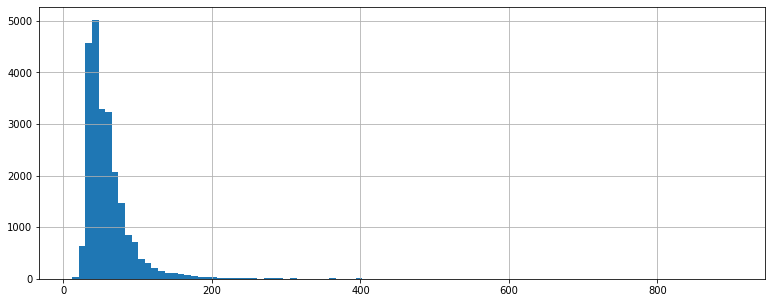

In [103]:
df['total_area'].hist(bins=100, figsize=(13,5))

Площадь большинства объектов меньше 200 м.кв.

#### Цена

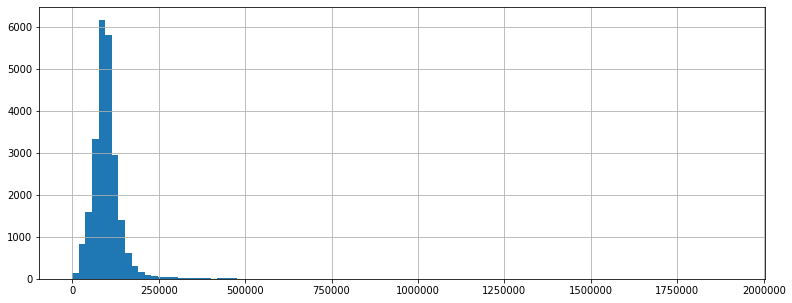

In [104]:
df['sqm_price'].hist(bins=100,  figsize=(13,5))

Цена не превышает 250000 т.р. за кв.м.

#### Число комнат

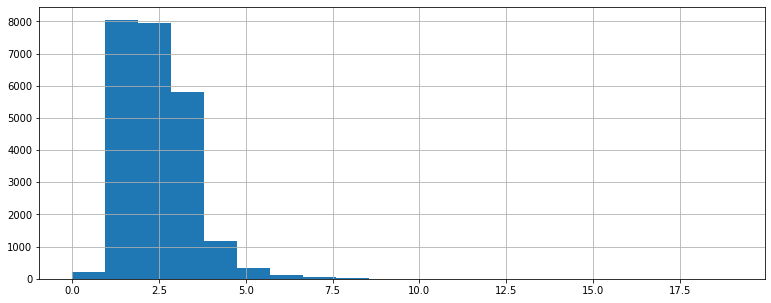

In [105]:
df['rooms'].hist(bins=20, range=(0,19), figsize=(13,5))

Число комнат  находится в пределах от 1 до 5.

#### Высота потолков

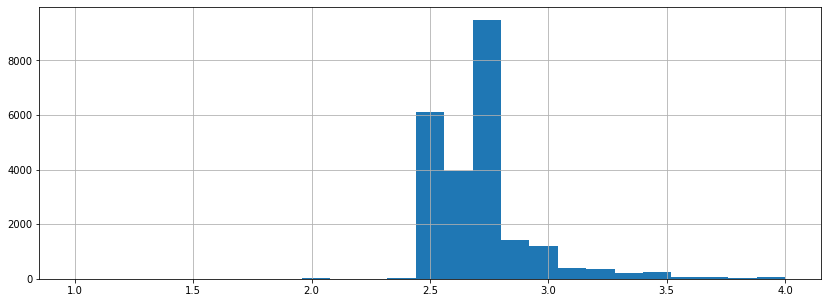

In [106]:
df['ceiling_height'].hist(bins=25,range=(1,4), figsize=(14,5))

Высота потолков большинства объектов находится в диапазоне 2,5-2,8м.

#### Вывод

- площадь - большинство меньше 200 м.кв.
- Цена - не превышает 250000 т.р. за кв.м.
- число комнат - находится в пределах от 1 до 5.
- высота потолков - большинства в диапазоне 2,5-2,8м.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

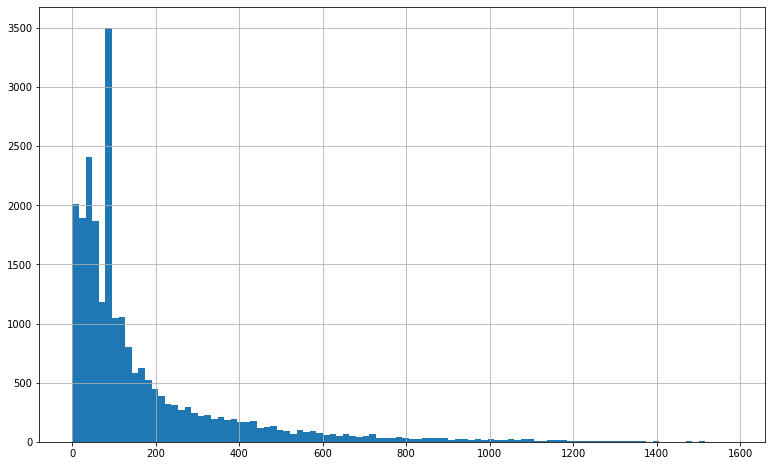

In [107]:
df['days_exposition'].hist(bins=100, figsize=(13,8))

In [108]:
df['days_exposition'].describe()

count    23699.000000
mean       170.076079
std        206.914023
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Вывод

Большинстов объектов продается за период до 200 дней. Медиана равна 95 дням , средняя равна 170 дн. Первые 25% от всех за время продаж, будем считать что продали быстро а последние 25% медленно, а значит:

- быстро  если прошло менее  45 дней
-медленно если прошло больше 200 дней

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Исходя из критериев определенных выше, можно отсеить следующие значения:

- признак площадь - total_area: более 200 м2;
- признак цена sqm_price:  250000р. за м.кв..
- признак количество комнат rooms:  более 7 комнат 
- признак высоту потолков ceiling_height:  менее 2 м., и более 5 м; 
- признак время продажи days_exposition: более 800 дней.

Посмотрим сколько у нас данных до фильтра:

In [109]:
len(df)

23699

оставим только значения удволетворяющие условиям

In [110]:
df = df[
    (df['total_area'] <= 200) 
    & (df['sqm_price'] <= 250000) 
    & (df['rooms'] <= 7) 
    & ((df['ceiling_height'] <= 5) & (df['ceiling_height'] >= 2))
    & (df['days_exposition'] <= 800)
        ]

Сколько данных у нас осталось

In [111]:
len(df)

22646

In [112]:
df.shape

(22646, 30)

#### Вывод

Мы убрали редкие и выбивающиеся значения всего их , чтобы они не влияли на исследование 

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [113]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_category,living_area_dolya,kitchen_area_dolya,km_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755,95,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.6,1,False,...,584,81,82920.792079,1,12,2018,первый,0.460396,0.272277,19.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,...,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.4,5,False,...,503,55,95065.789474,0,9,2018,другой,0.473684,0.299342,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381,95,72490.845228,1,3,2017,другой,0.547792,0.103356,4.0
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.0,4,False,...,503,45,52542.372881,0,1,2018,другой,0.644068,0.144068,13.0
23696,18,2500000,56.70,2018-02-11,2,2.70,3,29.7,1,False,...,503,99,44091.710758,6,2,2018,первый,0.523810,0.317460,13.0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,31.3,12,False,...,196,602,149511.400651,1,3,2017,другой,0.407818,0.303583,10.0


In [114]:
df_v2 = df[['last_price','total_area','rooms','ceiling_height','floor_category','km_to_center']]

In [115]:
df_v2.corr()

,last_price,total_area,rooms,ceiling_height,km_to_center
last_price,1.000000,0.805146,0.510034,0.423791,-0.279819
total_area,0.805146,1.000000,0.792524,0.367068,-0.196639
rooms,0.510034,0.792524,1.000000,0.186403,-0.136009
ceiling_height,0.423791,0.367068,0.186403,1.000000,-0.287081
km_to_center,-0.279819,-0.196639,-0.136009,-0.287081,1.000000


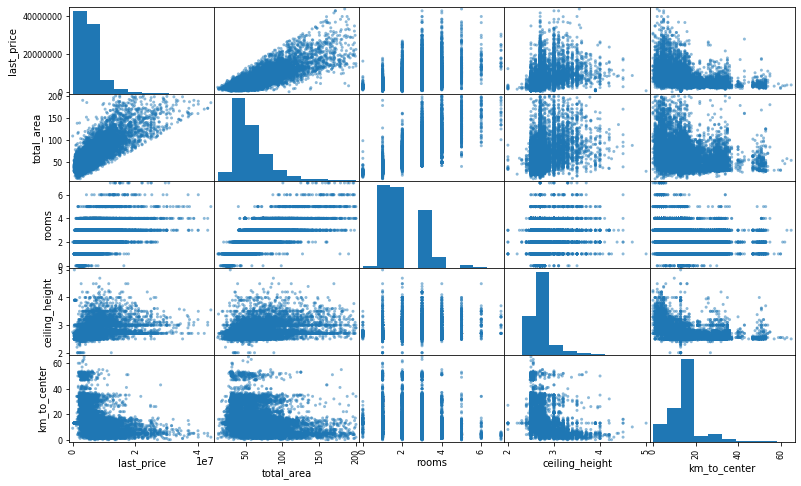

In [116]:
pd.plotting.scatter_matrix(df_v2,figsize=(13, 8))
plt.show()

#### Площадь

Построим график зависимости цены от площади:

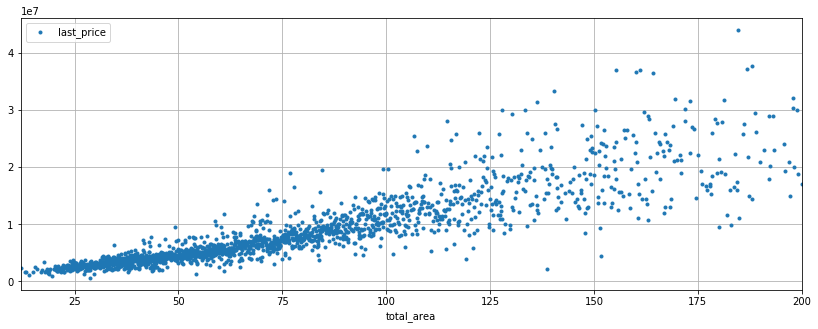

In [117]:
(df
     .pivot_table(index='total_area', values='last_price', aggfunc='mean')
     .plot(grid=True, marker='.', linestyle='None', figsize=(14, 5)))
plt.show()

Посчитаем коэфициент корреляции

In [118]:
 df['last_price'].corr(df['total_area'])

0.8051458499497693

Цена увеличивается.  Коэффициент корреляции показывает прямую положительную зависимость.При площадях объектов более 100 м.кв. разброс цен значительно увеличивается.

#### Колличество комнат

Изучим диаграмму зависимости цены от кол-ва комнат 

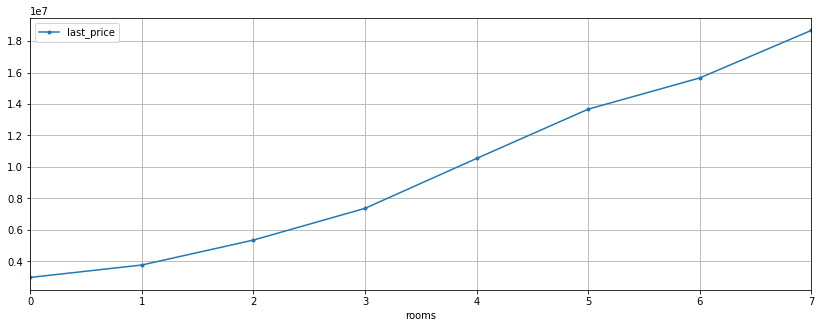

In [119]:
(df
.pivot_table(index='rooms', values='last_price', aggfunc='mean')
.plot(grid=True, marker='.',  figsize=(14, 5)))
plt.show()

Посчитаем коэфициент корреляции

In [120]:
 df['last_price'].corr(df['rooms'])

0.5100339618595192

Цена увеличивается с ростом числа комнат.  Коэффициент корреляции показывает прямую положительную зависимость

#### Этаж

Построим диаграмму зависимости средней цены объектов от типа этажа (первый, последний, другой)

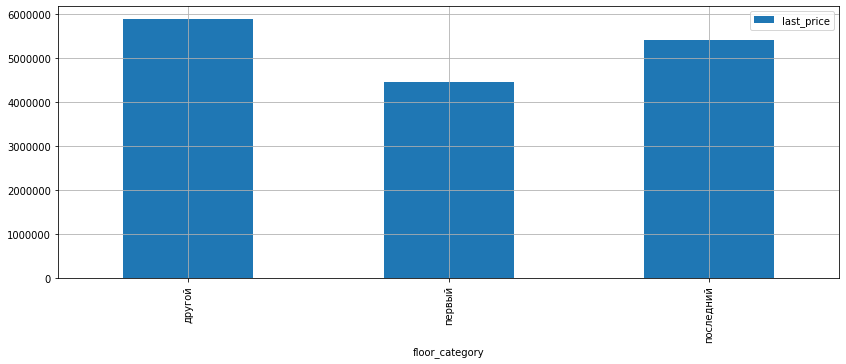

In [121]:
(df
.pivot_table(index='floor_category', values='last_price', aggfunc='mean')
.plot(grid=True, kind='bar', figsize=(14, 5) ))
plt.show()

Видно что средняя цена объектов на 1 и последнем этаже ниже чем дригих этажей. Причем на 1-м этаже самая низкая цена

#### Расстояние до центра

Построим диаграмму зависимости средней цены от расстояния до центра. Будем использовать столбец в километрах до центра.

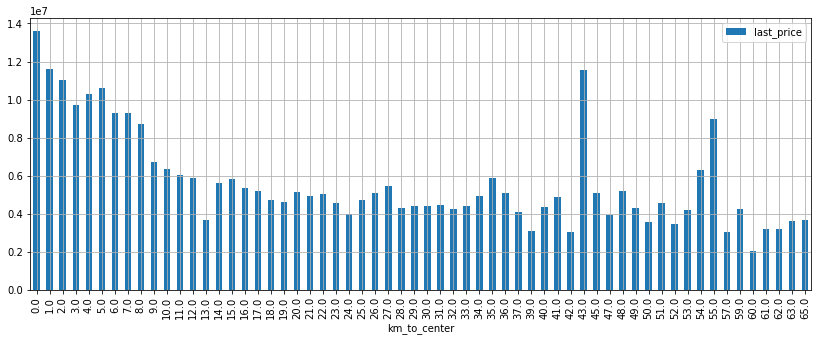

In [122]:
ax=(df
     .pivot_table(index='km_to_center', values='last_price', aggfunc='mean')
     .plot(grid=True, kind='bar',  figsize=(14, 5)))

Посчитаем коэфициент корреляции

In [123]:
 df['last_price'].corr(df['km_to_center'])

-0.27981875672190054

Видно отрицательную зависимость цены объектов от расстояния до центра приблизительно до 21 км. Отдельно можно заметить повышенную цену для объектов при расстоянии до 8 км, далее после 40 встречаются резкие перепады цены , скорее всего связанные с заполнением пропусков.Коэфициэнт корреляции отрицательный.

#### Дата размещения

Построим графики зависимости цен от даты размещений объявлений.

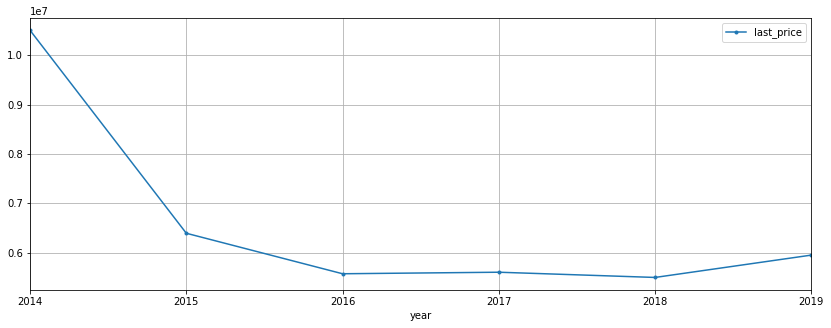

кореляция между last_price и year -0.017240292955429618


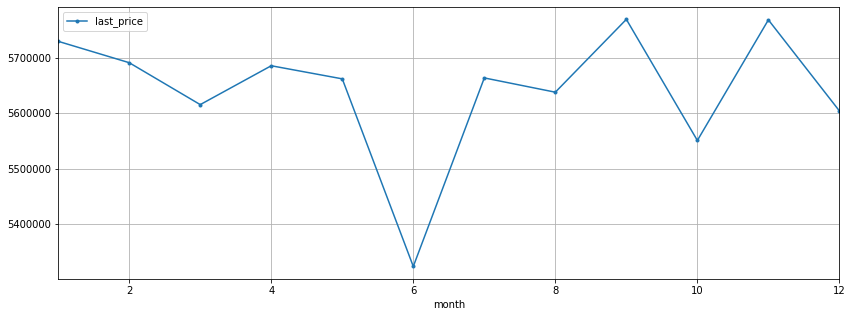

кореляция между last_price и month -0.00033012828220393346


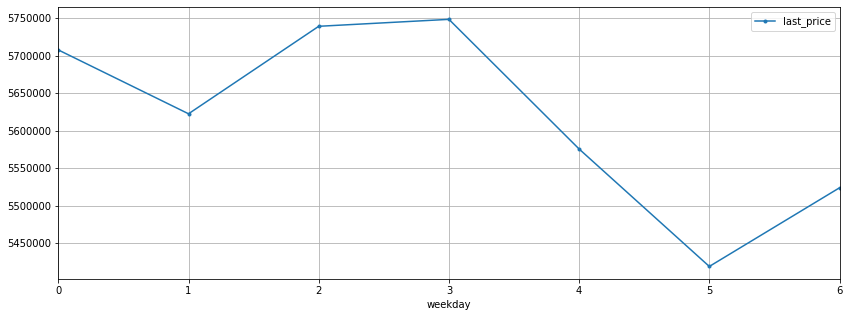

кореляция между last_price и weekday -0.015635099741338452


In [124]:
for i in ['year','month','weekday']:
    (df
     .pivot_table(index=i, values='last_price', aggfunc='mean')
     .plot(grid=True, marker='.',  figsize=(14, 5)))
    plt.show()
    print('кореляция между last_price и', i ,df['last_price'].corr(df[i]) )

По графику года видно, что средняя цена объявлений уменьшалась с 2014 по 2016 гг. Далее цены начали расти. Коэффициент корреляции показывает слабую отрицательную зависимость.

По графику месяца зависимости цен от месяца размещения объявления можно увидеть, что с начала года цена уменьшается, достигает минимума в середине лета и затем снова растет. В целом коэффициент корреляции показывает слабую обратную зависимость.

График зависимости цены от дня недели  и коэффициент корреляции показывает, что цена уменьшается ближе к выходным.

#### Вывод

 
- Площадь - Цена увеличивается от площади. Положительная корреляция. При площади более 100 м.кв. разброс цен значительно увеличивается.
- Число комнат - Цена увеличивается с ростом числа комнат. Положительная корреляция.
- Этаж -  Цена объектов на 1 и последнем этаже ниже, чем на дригих этажах. На 1-м этаже самая низкая цена
- Расстояние от центра - отрицательная зависимость цены объектов от расстояния до центра приблизительно до 21 км, далее после 40 встречаются резкие перепады цены.
-По дате(год, месяц, неделя):
  - цена объявлений уменьшалась с 2014 по 2016 гг. Далее цены начали расти. Коэффициент корреляции показывает слабую отрицательную зависимость. 
  - с начала года цена уменьшается, достигает минимума в середине лета и затем снова растет. В целом коэффициент корреляции показывает слабую обратную зависимость.
  - цена уменьшается ближе к выходным.


### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Сгруппируем данные по населенным пунктам и посчитаем кол-во объявлений и средню цену за квадратный метр на каждый населенный пункт. Отсортируем по кол-ву объявлений и выведем 10 населенных пунктов с наибольшим кол-вом объявлений.

In [125]:
df.groupby('locality_name')['sqm_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,14871,109852.029104
посёлок мурино,507,85877.432099
посёлок шушары,433,78601.211795
всеволожск,388,67221.245170
пушкин,352,102528.044206
колпино,333,75275.835712
посёлок парголово,321,90235.724689
гатчина,297,68933.235321
деревня кудрово,290,92521.241126


#### Вывод

Наибольшее число объявлений приходится на Санкт-Петербург. Наименьшие  Выборг.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

Выделдим объекты в Санкт-Петербурге.

In [126]:
df_spb = df.loc[df['locality_name']=='санкт-петербург']

Построим по ним диаграмму зависимости средней цены на объект от расстояния до центра в километрах.

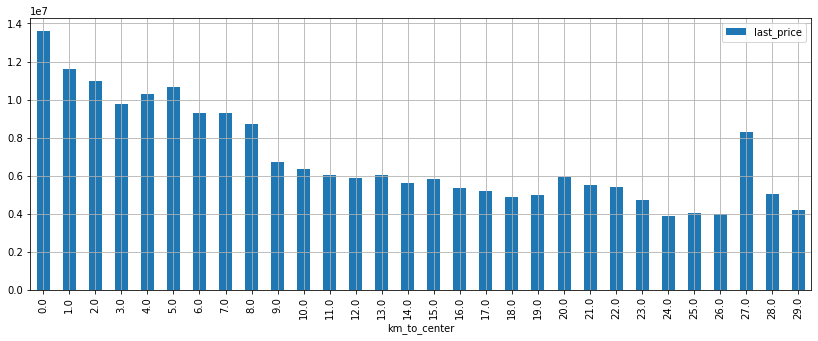

In [127]:
(df_spb
     .pivot_table(index='km_to_center', values='last_price', aggfunc='mean')
     .plot(grid=True, kind='bar', figsize=(14, 5)))
plt.show()

Можно заметить, что скачек цены происходит при значении расстояния от центра в 8км.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Создадим датафрейм в который поместим только объявления входящие в категорию центр:

In [128]:
df_spb_center = df_spb[df_spb['km_to_center'] <= 8]

#### Площадь

Построим гистрограмму общей площади для СПб и центра СПб:

Text(0.5, 0, 'Общая площадь, м2')

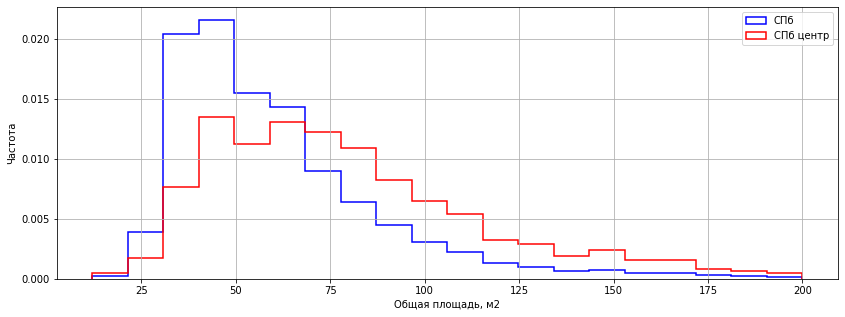

In [129]:
ax = df_spb.plot(kind='hist', y='total_area', histtype='step', density=True, figsize=(14, 5), 
                 color='b', bins=20, label='СПб', grid=True, legend=True, linewidth=1.5)
df_spb_center.plot(kind='hist', y='total_area', histtype='step', ax=ax, density=True, figsize=(14, 5), 
                 color='r', bins=20, label='СПб центр', grid=True, legend=True, linewidth=1.5)
plt.ylabel('Частота')
plt.xlabel('Общая площадь, м2')

#### Колличество комнат

Построим гистрограмму количества комнат для СПб и центра СПб:

Text(0.5, 0, 'Количество комнат')

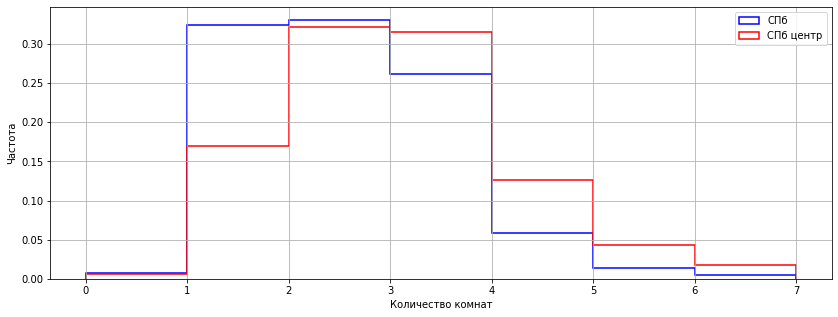

In [130]:
ax = df_spb.plot(
    kind='hist', y='rooms', histtype='step', density=True, figsize=(14, 5), 
                 color='b', bins=7, label='СПб', grid=True, legend=True, linewidth=1.5)
df_spb_center.plot(
    kind='hist', y='rooms', histtype='step', ax=ax, density=True, figsize=(14, 5), 
                 color='r', bins=7, label='СПб центр', grid=True, legend=True, linewidth=1.5)
plt.ylabel('Частота')
plt.xlabel('Количество комнат')

#### Стоимость

Построим гистрограмму стоимости для СПб и центра СПб:

Text(0.5, 0, 'Стоимость квартиры')

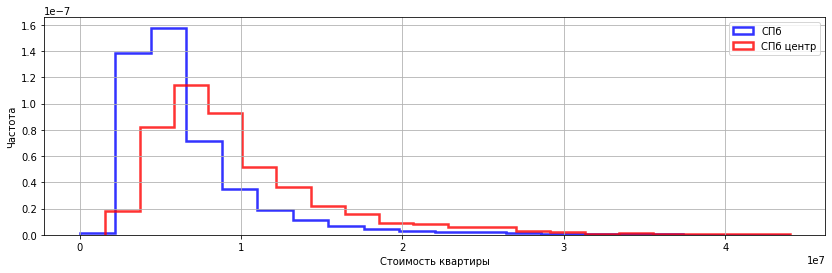

In [131]:
ax = df_spb.plot(
    kind='hist', y='last_price', histtype='step', density=True, figsize=(14, 4), color='b'
    , bins=20, label='СПб', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center.plot(
    kind='hist', y='last_price', histtype='step', ax=ax, density=True, figsize=(14, 4), color='r'
    , bins=20, label='СПб центр', grid=True, legend=True, linewidth=2.5, alpha=0.8)
plt.ylabel('Частота')
plt.xlabel('Стоимость квартиры')

#### Высота потолков

Построим гистрограмму высоты потолков для СПб и центра СПб:

Text(0.5, 0, 'Высота потолков')

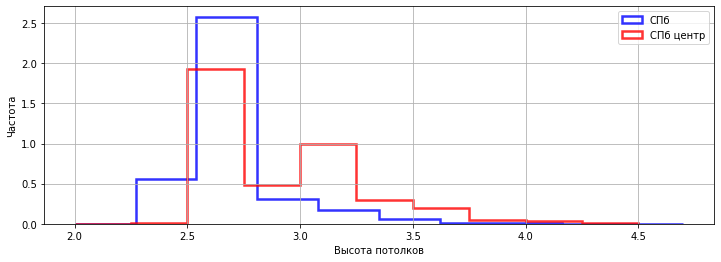

In [132]:
ax = df_spb.plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), 
    color='b' , bins=10, label='СПб', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center.plot(
    kind='hist', y='ceiling_height', histtype='step', ax=ax, density=True, figsize=(12, 4), 
    color='r', bins=10, label='СПб центр', grid=True, legend=True, linewidth=2.5, alpha=0.8)
plt.ylabel('Частота')
plt.xlabel('Высота потолков')

Средняя площадь , цена, число комнат, а также высота потолков квартир в центре СПб больше, чем в среднем для СПб.

#### Факторы влияющие на стоимость квартиры в центре

Посмотрим корреляцию признаков выведем корреляции для СПб и для центра СПб:

In [133]:
df_spb[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.842913,0.547609,-0.395407
total_area,0.842913,1.000000,0.791771,-0.333903
rooms,0.547609,0.791771,1.000000,-0.262529
city_centers_nearest,-0.395407,-0.333903,-0.262529,1.000000


In [134]:
df_spb_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.790935,0.499420,-0.125270
total_area,0.790935,1.000000,0.793366,-0.197416
rooms,0.499420,0.793366,1.000000,-0.231589
city_centers_nearest,-0.125270,-0.197416,-0.231589,1.000000


Исходя из корреляционных зависимостей, можно сделать выводы для центра СПб в сравнении с СПб:  
- Цена продажи менее зависит от расстояния до центра.`
- Зависимости цены продажи от общей площади и количества комнат менее выраженны.

#### Число комнат

Построим график сравнения цены взависимоти от количества комнат для СПб и центра СПб:

Text(0.5, 0, 'Количество комнат')

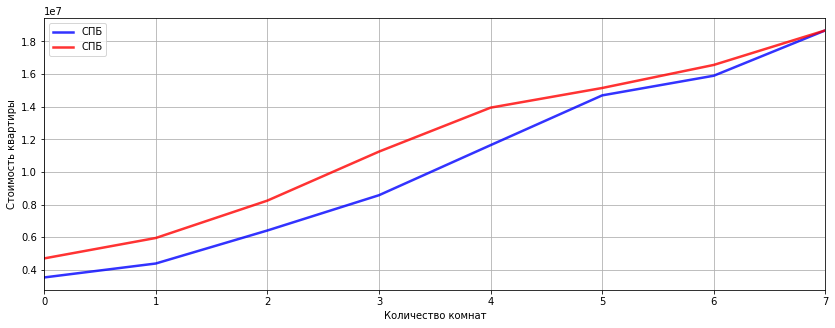

In [135]:
df_spb.groupby('rooms')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(14, 5), color='b', label='СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

df_spb_center.groupby('rooms')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(14, 5), color='r', label='СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 
plt.ylabel('Стоимость квартиры')
plt.xlabel('Количество комнат')

Text(0.5, 0, 'Количество комнат')

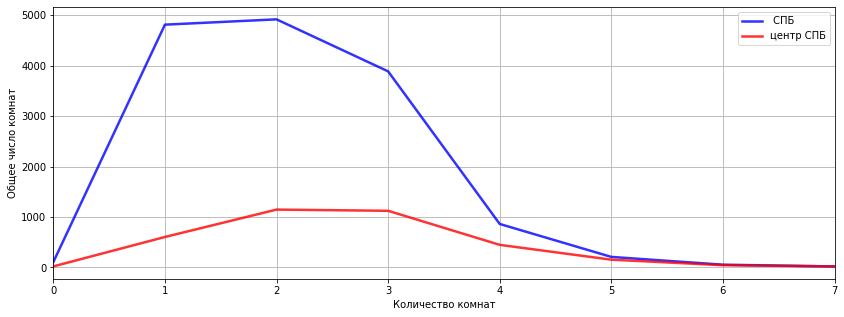

In [136]:
df_spb.groupby('rooms')['last_price'].agg(['count'])['count'].plot(
    figsize=(14, 5), color='b', label=' СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

df_spb_center.groupby('rooms')['last_price'].agg(['count'])['count'].plot(
    figsize=(14, 5), color='r', label='центр СПБ', grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 

plt.ylabel('Общее число комнат')
plt.xlabel('Количество комнат')

В серднем наблюдаем линейный положительный рост цены квартиры взависимоти от количества комнат. При этом цена в центре СПб выше, чем для СПб.

#### Этаж

Рассмотрим средние значения по этажам:

In [137]:
df_spb_center.groupby('floor_category')['last_price'].agg(['count', 'mean', 'median'])

,count,mean,median
floor_category,,,
другой,2567,1.034753e+07,8700000
первый,404,7.293627e+06,6200000
последний,591,1.008968e+07,8500000


Построим график сравнения цены взависимоти от этажа для СПб и центра СПб:

Text(0.5, 0, 'Стоимость')

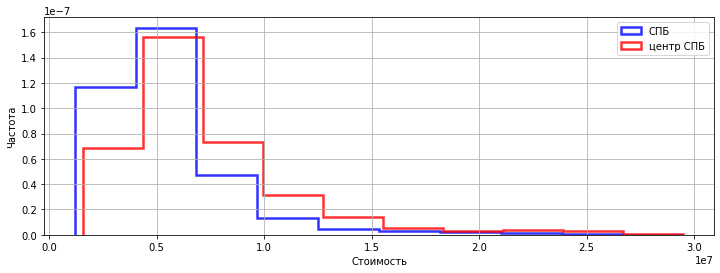

In [138]:
df_spb[df_spb['floor_category'] == 'первый']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(14, 5), 
    color='b', bins=10, label='СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center[df_spb_center['floor_category'] == 'первый']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), 
    color='r',  bins=10,  label='центр СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.ylabel('Частота')
plt.xlabel('Стоимость')

Стоимость квартир на первой этаже в среднем немного выше для центра СПб, при этом в среднем как в целом городу

Text(0.5, 0, 'Стоимость')

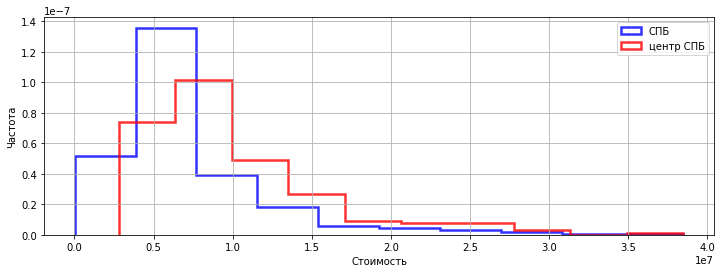

In [139]:
df_spb[df_spb['floor_category'] == 'последний']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
    bins=10, label='СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center[df_spb_center['floor_category'] == 'последний']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
    bins=10, label='центр СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.ylabel('Частота')
plt.xlabel('Стоимость')

Цена последних этажей для центра СПб выше, чем в среднем по СПб

Text(0.5, 0, 'Стоимость')

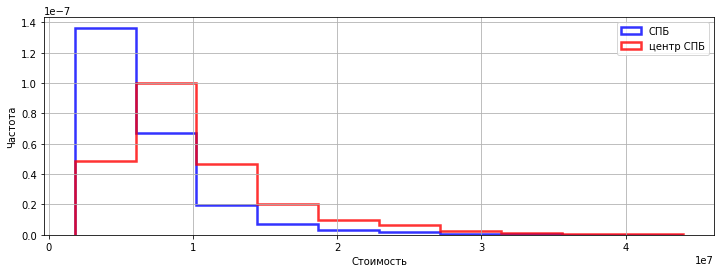

In [140]:
df_spb[df_spb['floor_category'] == 'другой']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='b', 
     bins=10, label='СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)
df_spb_center[df_spb_center['floor_category'] == 'другой']['last_price'].plot(
    kind='hist', y='ceiling_height', histtype='step', density=True, figsize=(12, 4), color='r', 
     bins=10, label='центр СПБ', grid=True, legend=True, linewidth=2.5, alpha=0.8)

plt.ylabel('Частота')
plt.xlabel('Стоимость')

Средняя цена других этаже выше для центра СПб

#### Расстояние до центра

Построим график сравнения цены взависимоти от удаленности для центра СПб:

Text(0.5, 0, 'Удаленность от центра, км')

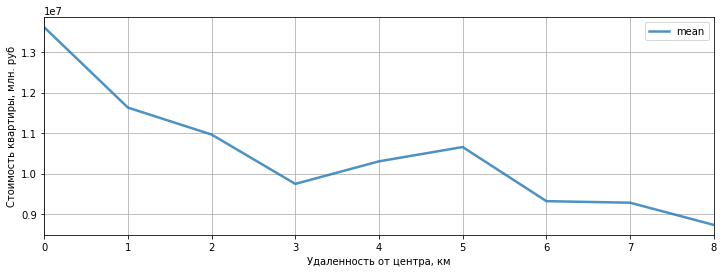

In [141]:
df_spb_center.groupby('km_to_center')['last_price'].agg(['mean'])['mean'].plot(
    figsize=(12, 4), grid=True, 
    legend=True, linewidth=2.5, alpha=0.8) 
plt.ylabel('Стоимость квартиры, млн. руб')
plt.xlabel('Удаленность от центра, км')

В целом тренд цены в зависимсоти от удаленности от центра такое же как и в целом по СПб, так же есть уменьшение в 3 км. Возможно это связано с тем, что трудно дойти пешком а траранспорт не так далеко надо ехать.

#### Дата размещения объявления

Посмотрим средние значения по дням неделям, месяцам, годам:

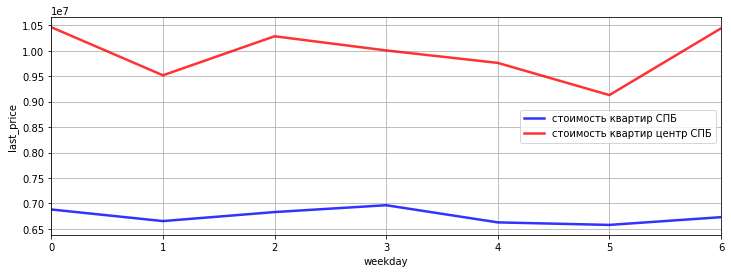

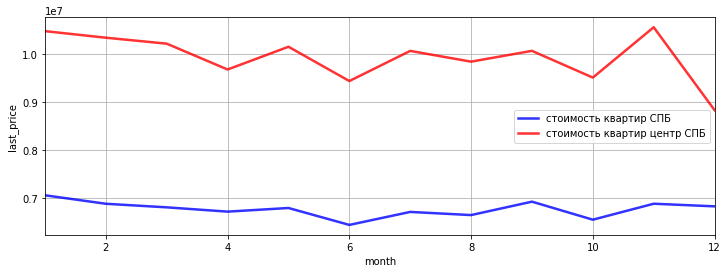

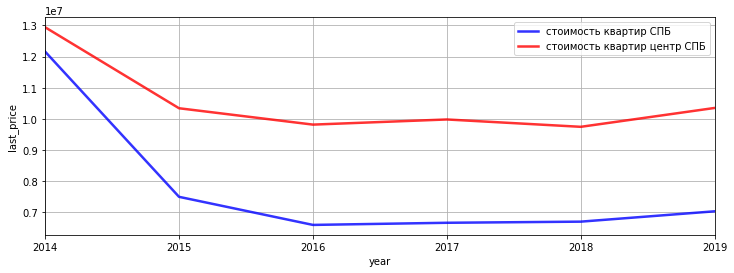

In [142]:
for i in ['weekday','month','year']:
    df_spb.groupby(i)['last_price'].agg(['mean'])['mean'].plot(
        figsize=(12, 4), color='b', label='стоимость квартир СПБ', grid=True, 
        legend=True, linewidth=2.5, alpha=0.8)

    df_spb_center.groupby(i)['last_price'].agg(['mean'])['mean'].plot(
        figsize=(12, 4), color='r', label='стоимость квартир центр СПБ', grid=True, 
        legend=True, linewidth=2.5, alpha=0.8)

    plt.ylabel('last_price')
    plt.xlabel(i)
    plt.show()

По дням недели, активность размещения объявлений в начале неделе выше, чем в других днях, а по месяцам, а также по годам, тренд такойже как и в целом СПб

#### Вывод

В центре СПБ стоимость квартир гараздо выше чем за его пределами.Зависимости цены продажи от общей площади и количества комнат менее выраженны.

## Общий вывод

При осмотре данных, видно:  
- имеется большое количество пропущенных значений;
- столбец с датами, потребуется привести к формату даты;
- наименование столбца 'cityCenters_nearest' привести к "змеиному" виду;
- явно имеются некорректные максимальные и минимальные значения (выборосы), например: высота потолков, возможно балконы и т.д.

При предобработке данных:
- заменили пропущенные значения
- при измененили типы данных

Для СПб в целом характерно:
- Чем больше плошадь квартиры, тем выше стоимость.
- Чем больше комнат, тем выше цена квартиры.
- Примерно до 7 км. от центра цена квартиры почти не меняется, далее чем дальше от центра, тем ниже стоимость.
- Цена кваритры расчет до четверга, снижась в пятницу, и немного поднимается в субботу. 
- При этом видно, что в выходные дни размещают мало объявлений.
- Цена немного проседает в начале лета, и потом растет к концу года. При этом наибольшая активность в феврале и в ноябрe.
- Видны сплески в 2014, 2015 В целом цена равномерная, и не сильно менялась по годам.

Для центра СПб характерно:
- Средняя площадь , цена, число комнат, а также высота потолков квартир в центре СПб больше, чем в среднем для СПб.
- Более нормальное распределение стоимостей квартир в центре.
- Стоимость последних этаже в среднем выше относительно других этажей.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод